# Demo notebook

A quick presentation of what is possible

In [26]:
from cifar10_classifier.classifier import Classifier
from cifar10_classifier.config import Config
from cifar10_classifier.data_getter import DataGetter
from cifar10_classifier.feature_extractor import FeatureExtractor

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Please install for this notebook, just for better visuals
import seaborn as sns

import matplotlib.pyplot as plt
import os
import logging
import copy

In [2]:
logging.getLogger().setLevel(logging.INFO)

## Some initialization

In [3]:
project_root_notebooks = os.getcwd()

conf = Config(project_root_notebooks)
data_getter = DataGetter(conf)
feature_extractor_HOG = FeatureExtractor('HOG')
feature_extractor_SIFT = FeatureExtractor('SIFT')
feature_extractor_flatten = FeatureExtractor('flatten')

In [4]:
data_getter.load_external_data()
# data_getter.save_data()

## Feature Extraction

In [5]:
feature_extractor_HOG.extract(data_getter.train_data, data_getter.train_labels, train=True)
feature_extractor_HOG.extract(data_getter.test_data, data_getter.test_labels, train=False)
print('HOG done')

HOG done


In [6]:
feature_extractor_SIFT.extract(data_getter.train_data, data_getter.train_labels, train=True)
feature_extractor_SIFT.extract(data_getter.test_data, data_getter.test_labels, train=False)
print('SIFT done')

SIFT done


In [7]:
feature_extractor_flatten.extract(data_getter.train_data, data_getter.train_labels, train=True)
feature_extractor_flatten.extract(data_getter.test_data, data_getter.test_labels, train=False)
print('flatten done')

flatten done


## Training classifiers

In [8]:
clf_SVC = SVC()
clf_LogReg = LogisticRegression(max_iter=10000)
clf_RandomForest = RandomForestClassifier()

clf_SVC=Classifier(clf_SVC)
clf_LogReg=Classifier(clf_LogReg)
clf_RandomForest=Classifier(clf_RandomForest)

### Training SVC on HOG feature extractor

In [9]:
clf_SVC.fit_classifier(feature_extractor_HOG.train_descriptors, data_getter.train_labels)

### Training LogisticRegression on HOG feature extractor

In [10]:
clf_LogReg.fit_classifier(feature_extractor_HOG.train_descriptors, data_getter.train_labels)

### Training RandomForest on HOG feature extractor

In [11]:
clf_RandomForest.fit_classifier(feature_extractor_HOG.train_descriptors, data_getter.train_labels)

### Storing HOG Models

In [12]:
HOG_models = [copy.deepcopy(clf_SVC), copy.deepcopy(clf_LogReg), copy.deepcopy(clf_RandomForest)]

In [13]:
clf_SVC = SVC()
clf_LogReg = LogisticRegression(max_iter=10000)
clf_RandomForest = RandomForestClassifier()

clf_SVC=Classifier(clf_SVC)
clf_LogReg=Classifier(clf_LogReg)
clf_RandomForest=Classifier(clf_RandomForest)

### Training SVC on SIFT feature extractor

In [14]:
clf_SVC.fit_classifier(feature_extractor_SIFT.train_descriptors, data_getter.train_labels)

### Training LogisticRegression on SIFT feature extractor

In [15]:
clf_LogReg.fit_classifier(feature_extractor_SIFT.train_descriptors, data_getter.train_labels)

### Training RandomForest on SIFT feature extractor

In [16]:
clf_RandomForest.fit_classifier(feature_extractor_SIFT.train_descriptors, data_getter.train_labels)

### Storing SIFT Models

In [17]:
SIFT_models = [copy.deepcopy(clf_SVC), copy.deepcopy(clf_LogReg), copy.deepcopy(clf_RandomForest)]

In [18]:
clf_SVC = SVC()
clf_LogReg = LogisticRegression(max_iter=10000)
clf_RandomForest = RandomForestClassifier()

clf_SVC=Classifier(clf_SVC)
clf_LogReg=Classifier(clf_LogReg)
clf_RandomForest=Classifier(clf_RandomForest)

### Training SVC on flatten feature extractor

In [19]:
# Takes too much time, won't be done
# clf_SVC.fit_classifier(feature_extractor_flatten.train_descriptors, data_getter.train_labels)

### Training LogisticRegression on flatten feature extractor

In [20]:
# Takes too much time, won't be done
# clf_LogReg.fit_classifier(feature_extractor_flatten.train_descriptors, data_getter.train_labels)

### Training RandomForest on flatten feature extractor

In [21]:
clf_RandomForest.fit_classifier(feature_extractor_flatten.train_descriptors, data_getter.train_labels)

### Storing flatten models

In [22]:
# flatten_models = [copy.deepcopy(clf_SVC), copy.deepcopy(clf_LogReg), copy.deepcopy(clf_RandomForest)]
flatten_models = [copy.deepcopy(clf_RandomForest)]

# Some Metrics

SVC
0.6419
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1000
           1       0.77      0.78      0.78      1000
           2       0.54      0.49      0.52      1000
           3       0.48      0.45      0.46      1000
           4       0.55      0.61      0.58      1000
           5       0.52      0.51      0.52      1000
           6       0.69      0.73      0.71      1000
           7       0.72      0.68      0.70      1000
           8       0.72      0.71      0.72      1000
           9       0.75      0.74      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



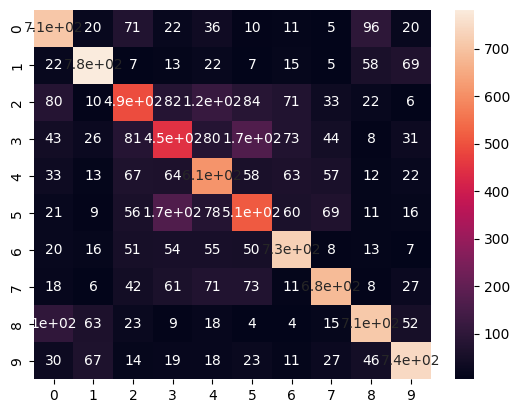

LogReg
0.531
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1000
           1       0.61      0.63      0.62      1000
           2       0.45      0.41      0.43      1000
           3       0.41      0.32      0.36      1000
           4       0.45      0.49      0.47      1000
           5       0.45      0.42      0.43      1000
           6       0.52      0.64      0.57      1000
           7       0.56      0.57      0.57      1000
           8       0.59      0.58      0.59      1000
           9       0.63      0.66      0.64      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



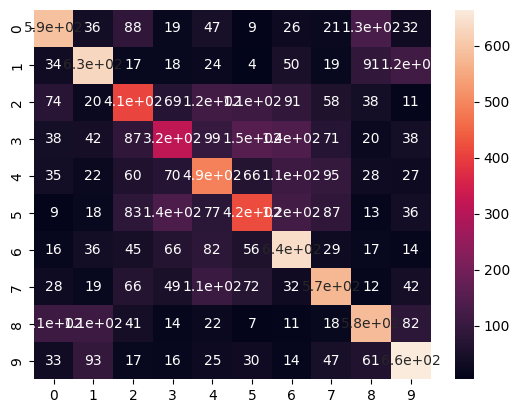

RandomForest
0.527
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1000
           1       0.59      0.70      0.64      1000
           2       0.47      0.37      0.41      1000
           3       0.37      0.27      0.31      1000
           4       0.45      0.48      0.46      1000
           5       0.39      0.45      0.42      1000
           6       0.54      0.65      0.59      1000
           7       0.61      0.52      0.56      1000
           8       0.61      0.60      0.60      1000
           9       0.60      0.60      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



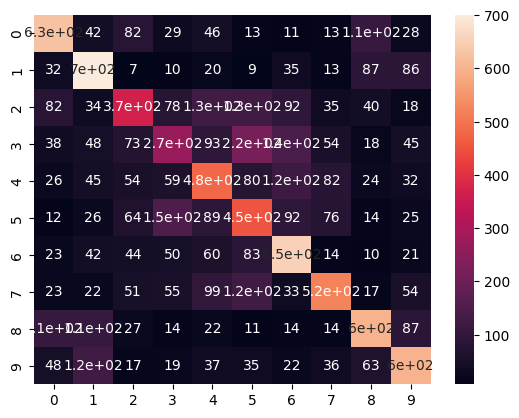

In [27]:
for model, name in zip(HOG_models, ['SVC', 'LogReg', 'RandomForest']):
    print(name)
    y_pred = model.predict(feature_extractor_HOG.test_descriptors)
    print(accuracy_score(data_getter.test_labels, y_pred))
    print(classification_report(data_getter.test_labels, y_pred))
    conf_matrix = confusion_matrix(data_getter.test_labels, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

SVC
0.1818
              precision    recall  f1-score   support

           0       0.26      0.32      0.29      1000
           1       0.16      0.18      0.17      1000
           2       0.13      0.07      0.09      1000
           3       0.12      0.06      0.08      1000
           4       0.14      0.08      0.10      1000
           5       0.17      0.21      0.19      1000
           6       0.15      0.09      0.11      1000
           7       0.19      0.25      0.21      1000
           8       0.22      0.27      0.25      1000
           9       0.18      0.27      0.22      1000

    accuracy                           0.18     10000
   macro avg       0.17      0.18      0.17     10000
weighted avg       0.17      0.18      0.17     10000



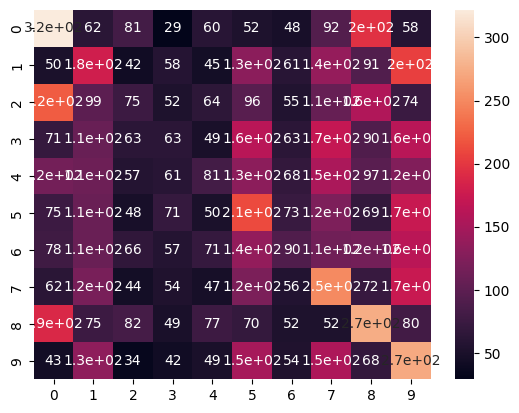

LogReg
0.1697
              precision    recall  f1-score   support

           0       0.21      0.30      0.25      1000
           1       0.17      0.17      0.17      1000
           2       0.14      0.06      0.09      1000
           3       0.08      0.02      0.03      1000
           4       0.12      0.04      0.06      1000
           5       0.16      0.25      0.19      1000
           6       0.16      0.06      0.09      1000
           7       0.17      0.29      0.21      1000
           8       0.21      0.21      0.21      1000
           9       0.16      0.29      0.20      1000

    accuracy                           0.17     10000
   macro avg       0.16      0.17      0.15     10000
weighted avg       0.16      0.17      0.15     10000



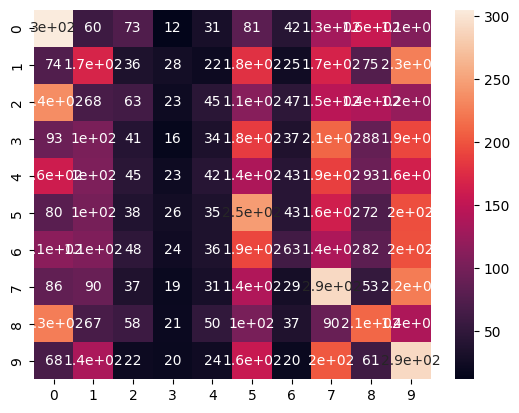

RandomForest
0.1622
              precision    recall  f1-score   support

           0       0.25      0.28      0.26      1000
           1       0.15      0.18      0.16      1000
           2       0.14      0.12      0.13      1000
           3       0.13      0.10      0.11      1000
           4       0.11      0.08      0.09      1000
           5       0.15      0.16      0.15      1000
           6       0.12      0.09      0.10      1000
           7       0.16      0.20      0.17      1000
           8       0.21      0.21      0.21      1000
           9       0.18      0.20      0.19      1000

    accuracy                           0.16     10000
   macro avg       0.16      0.16      0.16     10000
weighted avg       0.16      0.16      0.16     10000



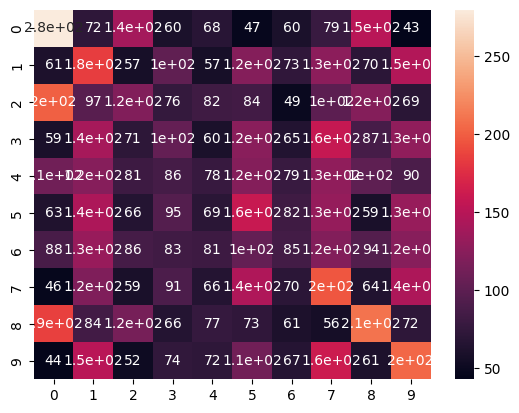

In [30]:
for model, name in zip(SIFT_models, ['SVC', 'LogReg', 'RandomForest']):
    print(name)
    y_pred = model.predict(feature_extractor_SIFT.test_descriptors)
    print(accuracy_score(data_getter.test_labels, y_pred))
    print(classification_report(data_getter.test_labels, y_pred))
    conf_matrix = confusion_matrix(data_getter.test_labels, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

RandomForest
0.4709
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.52      0.54      0.53      1000
           2       0.37      0.34      0.36      1000
           3       0.35      0.30      0.32      1000
           4       0.39      0.39      0.39      1000
           5       0.43      0.41      0.42      1000
           6       0.48      0.56      0.52      1000
           7       0.51      0.45      0.48      1000
           8       0.59      0.62      0.61      1000
           9       0.47      0.54      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



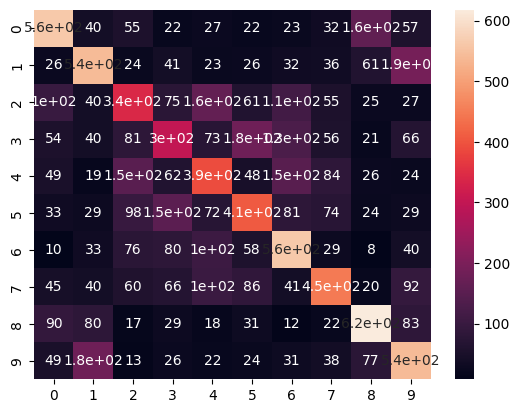

In [31]:
for model, name in zip(flatten_models, ['RandomForest']):
    print(name)
    y_pred = model.predict(feature_extractor_flatten.test_descriptors)
    print(accuracy_score(data_getter.test_labels, y_pred))
    print(classification_report(data_getter.test_labels, y_pred))
    conf_matrix = confusion_matrix(data_getter.test_labels, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

# Plotting some graphs

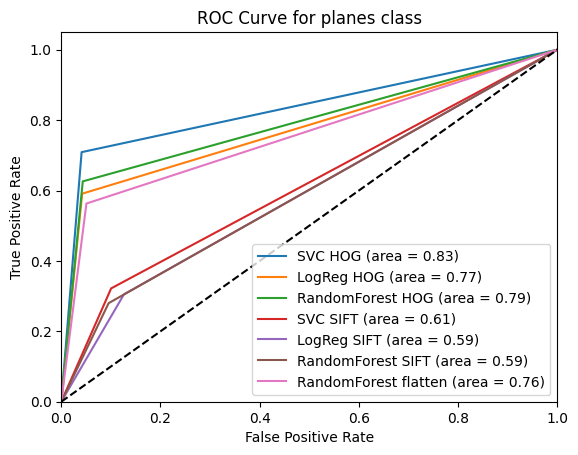

In [37]:
#Plot roc curves of every model on same graph for class 0
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

feature_extractors = [feature_extractor_HOG, feature_extractor_HOG, feature_extractor_HOG,
                      feature_extractor_SIFT, feature_extractor_SIFT, feature_extractor_SIFT, feature_extractor_flatten]
models = HOG_models + SIFT_models + flatten_models

model_names = ['SVC', 'LogReg', 'RandomForest'] * 2 + ['RandomForest']

feature_extractor_names = ['HOG', 'HOG', 'HOG', 'SIFT', 'SIFT', 'SIFT', 'flatten']

fpr = dict()
tpr = dict()
roc_auc = dict()
for model, feature_extractor, name, feature_name in zip(models, feature_extractors, model_names, feature_extractor_names):
    y_score = model.predict(feature_extractor.test_descriptors)
    y_test = data_getter.test_labels
    y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y_score = label_binarize(y_score, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    fpr[0], tpr[0], _ = roc_curve(y_test[:, 0], y_score[:, 0])
    roc_auc[0] = roc_auc_score(y_test[:, 0], y_score[:, 0])
    plt.plot(fpr[0], tpr[0], label=f'{name} {feature_name} (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for planes class')
plt.legend(loc="lower right")
plt.savefig('../reports/figures/roc_curve_planes.png')
plt.show()



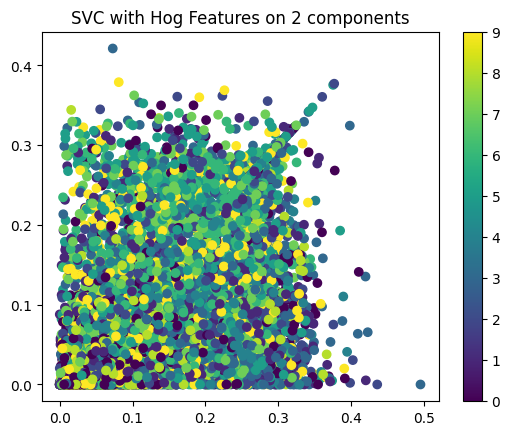

In [65]:
import numpy as np

X_train = np.array(feature_extractor_HOG.train_descriptors)
X_test = np.array(feature_extractor_HOG.test_descriptors)


model = copy.deepcopy(HOG_models[0])

y_pred = model.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.colorbar()
plt.title('SVC with Hog Features on 2 components')
plt.savefig('../reports/figures/svc_hog_viz1.png')

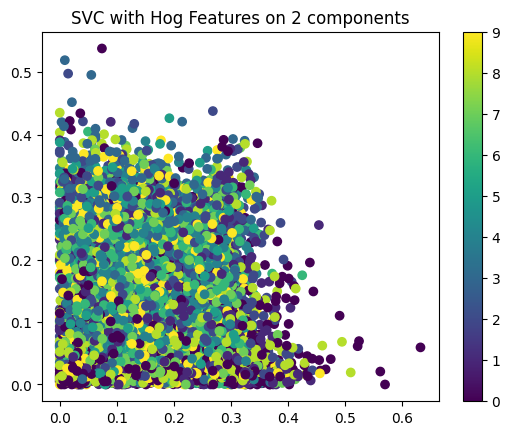

In [66]:
plt.scatter(X_test[:, 50], X_test[:, 8], c=y_pred)
plt.colorbar()
plt.title('SVC with Hog Features on 2 components')
plt.savefig('../reports/figures/svc_hog_viz2.png')

Data seems hard to separate, but rbf kernel probably works nicely on this according to the results

## Going Further
Something we could have done is use scaling and PCA

In [70]:
#train svc model on pca features and use StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = np.array(feature_extractor_HOG.train_descriptors)
X_test = np.array(feature_extractor_HOG.test_descriptors)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = copy.deepcopy(HOG_models[0].model)
model.fit(X_train_pca, data_getter.train_labels)
y_pred = model.predict(X_test_pca)

print(accuracy_score(data_getter.test_labels, y_pred))
print(classification_report(data_getter.test_labels, y_pred))


0.2565
              precision    recall  f1-score   support

           0       0.40      0.09      0.15      1000
           1       0.27      0.50      0.35      1000
           2       0.39      0.12      0.18      1000
           3       1.00      0.00      0.00      1000
           4       0.16      0.09      0.12      1000
           5       0.25      0.60      0.36      1000
           6       0.25      0.31      0.28      1000
           7       0.14      0.09      0.11      1000
           8       0.38      0.36      0.37      1000
           9       0.21      0.40      0.28      1000

    accuracy                           0.26     10000
   macro avg       0.35      0.26      0.22     10000
weighted avg       0.35      0.26      0.22     10000



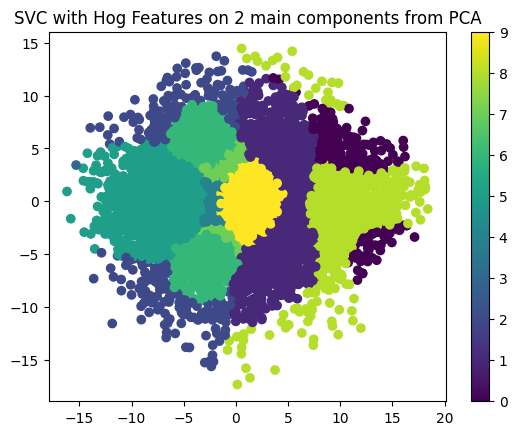

In [71]:

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred)
plt.colorbar()
plt.title('SVC with Hog Features on 2 main components from PCA')
plt.savefig('../reports/figures/svc_hog_pca.png')

As we see on the graph, data seems easily separable, but model struggles to do so